In [32]:
import buffett_code_com as bc

import json
import pandas as pd
from datetime import *

In [34]:
# 1年分の取得
start_d = "2020-01-01" #2019Q1の時系列と合わせる
end_d   = "2020-12-31"  #2020Q4の第4四半期の時系列と合わせる
ticker = 7974

In [51]:
import decimal

def generate_df_d(ticker:str, start_d:str, end_d:str):
    res_day = bc.fetch(bc.API_ENDPOINT_DAILY, ticker, start_d, end_d)
    json_data_day = json.loads(res_day.text,  parse_float=decimal.Decimal)
    df_d = pd.DataFrame.from_dict(json_data_day[ticker])
    return df_d

In [88]:
df_d = generate_df_d(str(ticker), '20170101', '20171231')
df_d

,num_of_shares,market_capital,enterprise_value,per_forecast,pbr,per_pbr,ev_ebitda_forecast,psr_forecast,pcfr_forecast,dividend_yield_forecast,dividend_yield_actual,debt_market_capital_ratio,cash_market_capital_ratio,day,ticker
0,120127921.0,2940731506080.0,2280255506080.0,58.814630121600004,2.3221758477031575,136.57791355997415,58.260443702700634,6.256875544851064,49.7257563719373,0.857843137254902,0.6127450980392157,0.0,22.459581863711715,2017-01-04T00:00:00.000Z,7974.0
1,120127921.0,2893280977285.0,2232804977285.0,57.8656195457,2.284706098526575,132.20593387107937,57.0480844499093,6.155916972946809,48.92340041740645,0.8719119784097987,0.6227942702927134,0.0,22.827924601356145,2017-01-05T00:00:00.000Z,7974.0
2,120127921.0,2889076500050.0,2228600500050.0,57.781530001,2.281385994169156,131.8219732659463,56.94066021232019,6.146971276702128,48.852305585992326,0.8731808731808732,0.6237006237006237,0.0,22.861146113250012,2017-01-06T00:00:00.000Z,7974.0
3,120127921.0,2927517434770.0,2267041434770.0,58.550348695400004,2.311741234008413,135.35325534472688,57.92282467027773,6.2287604995106385,49.50231547320719,0.8617152236356176,0.6155108740254411,0.0,22.56095872070836,2017-01-10T00:00:00.000Z,7974.0
4,120127921.0,3020616573545.0,2360140573545.0,60.4123314709,2.3852578304941137,144.0989866993702,60.30150421689363,6.4268437735,51.0765581688057,0.8351560946510241,0.5965400676078744,0.0,21.865602068946618,2017-01-11T00:00:00.000Z,7974.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,120126923.0,5088576458280.0,4405169458280.0,59.865605391529414,4.00040287093873,239.48653967875939,34.31726047613854,5.300600477375,54.5013865677013,0.84985835694051,1.0151085930122756,0.0,13.43021974029648,2017-12-25T00:00:00.000Z,7974.0
243,120126923.0,5006890150640.0,4323483150640.0,58.904590007529414,3.9361848833976936,231.85935675037612,33.68090577442625,5.215510573583333,53.626482345179184,0.8637236084452975,1.0316698656429943,0.0,13.649330810915519,2017-12-26T00:00:00.000Z,7974.0
244,120126923.0,5041726958310.0,4358319958310.0,59.31443480364706,3.9635719663196065,235.09703098582747,33.952292338391786,5.25179891490625,53.99960326360774,0.8577555396711937,1.0245413390517035,0.0,13.555018065259922,2017-12-27T00:00:00.000Z,7974.0
245,120126923.0,4937216535300.0,4253809535300.0,58.08490041529412,3.8814107175538677,225.4513549999717,33.13813264649518,5.1429338909375,52.88024050832209,0.8759124087591241,1.0462287104622872,0.0,13.84194910459754,2017-12-28T00:00:00.000Z,7974.0


In [54]:
# HASH KEY / RANGE KEY の設定
df_d['ticker'] = ticker
df_d['to_datetime'] = pd.to_datetime(df_d['day'])
df_d["day"]   = df_d['to_datetime'].dt.strftime("%Y%m%d")
df_d = df_d.drop(['to_datetime'], axis=1)
df_d

,num_of_shares,market_capital,enterprise_value,per_forecast,pbr,per_pbr,ev_ebitda_forecast,psr_forecast,pcfr_forecast,dividend_yield_forecast,dividend_yield_actual,debt_market_capital_ratio,cash_market_capital_ratio,day,ticker
0,119124238.0,4874563818960.0,4143677818960.0,27.080910105333334,3.5158572635888325,95.21261449843242,15.371777459007879,3.899651055168,25.714607303918466,1.857282502443793,1.9794721407624634,0.0,14.993874880808027,20191001,7974
1,119124238.0,4905536120840.0,4174650120840.0,27.25297844911111,3.538196532614568,96.42639385206448,15.486675226810702,3.924428896672,25.87799434934903,1.8455560951918408,1.9669742593491986,0.0,14.899207385203123,20191002,7974
2,119124238.0,4823340396620.0,4092454396620.0,26.79633553677778,3.4789115494308853,93.22208118132147,15.181754227641672,3.858672317296,25.444390267244835,1.8770066683131637,2.00049394912324,0.0,15.153108424862053,20191003,7974
3,119124238.0,4880520030860.0,4149634030860.0,27.114000171444445,3.520153276863012,95.44543655237443,15.393873183585345,3.904416024688,25.74602788957819,1.8550158652672688,1.9770563827190626,0.0,14.975576278317416,20191004,7974
4,119124238.0,4813810457580.0,4082924457580.0,26.743391431000003,3.4720379281921976,92.85406937692223,15.146401068317727,3.851048366064,25.394117330189278,1.880722593417471,2.0044543429844097,0.0,15.183107154730624,20191007,7974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,119123573.0,7054497993060.0,6140853993060.0,35.2724899653,4.539924571434088,160.13444388912774,19.83755493514926,5.87874832755,33.66386230505304,1.4184397163120568,1.840594393785883,0.0,12.951226308361205,20200924,7974
234,119123573.0,7030673278460.0,6117029278460.0,35.1533663923,4.524592168288414,159.0546462675737,19.760591033186135,5.858894398716667,33.55017144958174,1.423246357167062,1.8468315825144017,0.0,12.99511389327602,20200925,7974
235,119123573.0,7159326737300.0,6245682737300.0,35.7966336865,4.607387145275053,164.92894989130005,20.176196103787024,5.966105614416667,34.16410206912678,1.3976705490848587,1.8136439267886857,0.0,12.761591047939277,20200928,7974
236,119123573.0,7257008067160.0,6343364067160.0,36.2850403358,4.670249998172317,169.4602095619524,20.49174810183585,6.047506722633333,34.630234576559126,1.3788575180564675,1.789231779382797,0.0,12.589816513150865,20200929,7974


In [ ]:
# Dynamoへ追加する

In [68]:
import json
import boto3

def store_daily(df_d:pd.DataFrame, dynamodb=None):
    if not dynamodb:
        dynamodb = boto3.resource('dynamodb', endpoint_url="http://localhost:8000")

    table = dynamodb.Table('Daily')
    for index, row in df_d.iterrows():
        table.put_item(Item=row.to_dict())

In [70]:
# if __name__ == '__main__':
store_daily(df_d)

In [58]:
# クエリ - tickerのみ

In [61]:
from pprint import pprint

In [65]:
import boto3
from boto3.dynamodb.conditions import Key # Boto 3 SDK によって Attr が自動的に作成される

def get_daily(ticker, dynamodb=None):
    if not dynamodb:
        dynamodb = boto3.resource('dynamodb', endpoint_url="http://localhost:8000")

    table = dynamodb.Table('Daily')
    response = table.query(
        KeyConditionExpression=Key('ticker').eq(ticker)
    )
    return response['Items']

print(f"Data with ticker : {ticker}")
daily_dict = get_daily(ticker)
for day in daily_dict:
    pprint(day)

Data with ticker : 7974
{'cash_market_capital_ratio': Decimal('14.993874880808027'),
 'day': '20191001',
 'debt_market_capital_ratio': Decimal('0'),
 'dividend_yield_actual': Decimal('1.9794721407624634'),
 'dividend_yield_forecast': Decimal('1.857282502443793'),
 'enterprise_value': Decimal('4143677818960'),
 'ev_ebitda_forecast': Decimal('15.371777459007879'),
 'market_capital': Decimal('4874563818960'),
 'num_of_shares': Decimal('119124238'),
 'pbr': Decimal('3.5158572635888325'),
 'pcfr_forecast': Decimal('25.714607303918466'),
 'per_forecast': Decimal('27.080910105333334'),
 'per_pbr': Decimal('95.21261449843242'),
 'psr_forecast': Decimal('3.899651055168'),
 'ticker': Decimal('7974')}
{'cash_market_capital_ratio': Decimal('14.899207385203123'),
 'day': '20191002',
 'debt_market_capital_ratio': Decimal('0'),
 'dividend_yield_actual': Decimal('1.9669742593491986'),
 'dividend_yield_forecast': Decimal('1.8455560951918408'),
 'enterprise_value': Decimal('4174650120840'),
 'ev_ebitda_

 'debt_market_capital_ratio': Decimal('0'),
 'dividend_yield_actual': Decimal('1.8202247191011236'),
 'dividend_yield_forecast': Decimal('1.707865168539326'),
 'enterprise_value': Decimal('4570142591000'),
 'ev_ebitda_forecast': Decimal('16.953831338754433'),
 'market_capital': Decimal('5301028591000'),
 'num_of_shares': Decimal('119124238'),
 'pbr': Decimal('3.8234518140201135'),
 'pcfr_forecast': Decimal('27.964321237154735'),
 'per_forecast': Decimal('29.45015883888889'),
 'per_pbr': Decimal('112.6012632357302'),
 'psr_forecast': Decimal('4.2408228728'),
 'ticker': Decimal('7974')}
{'cash_market_capital_ratio': Decimal('14.03360842000605'),
 'day': '20191219',
 'debt_market_capital_ratio': Decimal('0'),
 'dividend_yield_actual': Decimal('1.8526989935956084'),
 'dividend_yield_forecast': Decimal('1.738334858188472'),
 'enterprise_value': Decimal('4477225685360'),
 'ev_ebitda_forecast': Decimal('16.609138035345968'),
 'market_capital': Decimal('5208111685360'),
 'num_of_shares': Decim

 'num_of_shares': Decimal('119123759'),
 'pbr': Decimal('2.961553005795817'),
 'pcfr_forecast': Decimal('20.20987057418338'),
 'per_forecast': Decimal('21.130285822619047'),
 'per_pbr': Decimal('62.57846149130218'),
 'psr_forecast': Decimal('3.5498880182'),
 'ticker': Decimal('7974')}
{'cash_market_capital_ratio': Decimal('18.83452351857306'),
 'day': '20200305',
 'debt_market_capital_ratio': Decimal('0'),
 'dividend_yield_actual': Decimal('2.1360759493670884'),
 'dividend_yield_forecast': Decimal('2.3470464135021096'),
 'enterprise_value': Decimal('3666384941280'),
 'ev_ebitda_forecast': Decimal('11.843705796798078'),
 'market_capital': Decimal('4517172941280'),
 'num_of_shares': Decimal('119123759'),
 'pbr': Decimal('3.014821207510802'),
 'pcfr_forecast': Decimal('20.573376971088155'),
 'per_forecast': Decimal('21.51034733942857'),
 'per_pbr': Decimal('64.84985133983281'),
 'psr_forecast': Decimal('3.613738353024'),
 'ticker': Decimal('7974')}
{'cash_market_capital_ratio': Decimal('1

 'psr_forecast': Decimal('4.42246535775'),
 'ticker': Decimal('7974')}
{'cash_market_capital_ratio': Decimal('16.995460029535444'),
 'day': '20200519',
 'debt_market_capital_ratio': Decimal('0'),
 'dividend_yield_actual': Decimal('2.4783992723965436'),
 'dividend_yield_forecast': Decimal('1.9099590723055935'),
 'enterprise_value': Decimal('4348655951080'),
 'ev_ebitda_forecast': Decimal('14.047997464376513'),
 'market_capital': Decimal('5239057951080'),
 'num_of_shares': Decimal('119123646'),
 'pbr': Decimal('3.400468720174831'),
 'pcfr_forecast': Decimal('25.00063443874459'),
 'per_forecast': Decimal('26.1952897554'),
 'per_pbr': Decimal('89.0762634291539'),
 'psr_forecast': Decimal('4.3658816259'),
 'ticker': Decimal('7974')}
{'cash_market_capital_ratio': Decimal('16.90704211940667'),
 'day': '20200520',
 'debt_market_capital_ratio': Decimal('0'),
 'dividend_yield_actual': Decimal('2.46550554173264'),
 'dividend_yield_forecast': Decimal('1.9000226193168965'),
 'enterprise_value': Dec

 'dividend_yield_forecast': Decimal('1.776274053711144'),
 'enterprise_value': Decimal('4719709767170'),
 'ev_ebitda_forecast': Decimal('15.246658183048678'),
 'market_capital': Decimal('5633353767170'),
 'num_of_shares': Decimal('119123573'),
 'pbr': Decimal('3.62534672379463'),
 'pcfr_forecast': Decimal('26.88220277618977'),
 'per_forecast': Decimal('28.16676883585'),
 'per_pbr': Decimal('102.11430311892948'),
 'psr_forecast': Decimal('4.694461472641667'),
 'ticker': Decimal('7974')}
{'cash_market_capital_ratio': Decimal('16.215044862180775'),
 'day': '20200730',
 'debt_market_capital_ratio': Decimal('0'),
 'dividend_yield_actual': Decimal('2.3044397463002113'),
 'dividend_yield_forecast': Decimal('1.7758985200845665'),
 'enterprise_value': Decimal('4720901002900'),
 'ev_ebitda_forecast': Decimal('15.250506378146836'),
 'market_capital': Decimal('5634545002900'),
 'num_of_shares': Decimal('119123573'),
 'pbr': Decimal('3.6261133439519138'),
 'pcfr_forecast': Decimal('26.8878873189633

In [67]:
df_d = pd.DataFrame.from_dict(daily_dict)
df_d

,pbr,ticker,per_forecast,enterprise_value,psr_forecast,pcfr_forecast,debt_market_capital_ratio,dividend_yield_actual,num_of_shares,ev_ebitda_forecast,market_capital,per_pbr,dividend_yield_forecast,cash_market_capital_ratio,day
0,3.5158572635888325,7974,27.080910105333334,4143677818960,3.899651055168,25.714607303918466,0,1.9794721407624634,119124238,15.371777459007879,4874563818960,95.21261449843242,1.857282502443793,14.993874880808027,20191001
1,3.538196532614568,7974,27.25297844911111,4174650120840,3.924428896672,25.87799434934903,0,1.9669742593491986,119124238,15.486675226810702,4905536120840,96.42639385206448,1.8455560951918408,14.899207385203123,20191002
2,3.4789115494308853,7974,26.79633553677778,4092454396620,3.858672317296,25.444390267244835,0,2.00049394912324,119124238,15.181754227641672,4823340396620,93.22208118132147,1.8770066683131637,15.153108424862053,20191003
3,3.520153276863012,7974,27.114000171444445,4149634030860,3.904416024688,25.74602788957819,0,1.9770563827190626,119124238,15.393873183585345,4880520030860,95.44543655237443,1.8550158652672688,14.975576278317416,20191004
4,3.4720379281921976,7974,26.743391431000003,4082924457580,3.851048366064,25.394117330189278,0,2.0044543429844097,119124238,15.146401068317727,4813810457580,92.85406937692223,1.880722593417471,15.183107154730624,20191007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,4.539924571434088,7974,35.2724899653,6140853993060,5.87874832755,33.66386230505304,0,1.840594393785883,119123573,19.83755493514926,7054497993060,160.13444388912774,1.4184397163120568,12.951226308361205,20200924
234,4.524592168288414,7974,35.1533663923,6117029278460,5.858894398716667,33.55017144958174,0,1.8468315825144017,119123573,19.760591033186135,7030673278460,159.0546462675737,1.423246357167062,12.99511389327602,20200925
235,4.607387145275053,7974,35.7966336865,6245682737300,5.966105614416667,34.16410206912678,0,1.8136439267886857,119123573,20.176196103787024,7159326737300,164.92894989130005,1.3976705490848587,12.761591047939277,20200928
236,4.670249998172317,7974,36.2850403358,6343364067160,6.047506722633333,34.630234576559126,0,1.789231779382797,119123573,20.49174810183585,7257008067160,169.4602095619524,1.3788575180564675,12.589816513150865,20200929


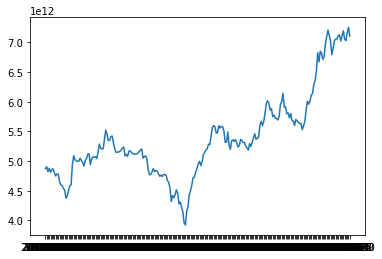

In [73]:
import numpy as np
import matplotlib.pyplot as plt
 
# 折れ線グラフを出力
plt.plot(df_d["day"], df_d["market_capital"])
plt.show()